In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_rows', None)

In [170]:
df = pd.read_csv('data2.csv')
df.head()

,Responden,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Cholesterol Total (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir
0,1,M,19.0,126.0,88.0,172.5,49.5,16.53,66.0,84.0,187.0,99.0,26.4,6.0,0.97,Purworejo
1,2,M,19.0,120.0,80.0,158.0,53.6,21.50,71.0,84.0,187.0,99.0,26.4,6.0,0.60,Bogor
2,3,M,19.0,120.0,80.0,170.0,59.5,20.59,80.0,80.0,187.0,99.0,26.4,6.0,1.37,bandung
3,4,F,19.0,100.0,70.0,149.0,45.1,20.31,62.0,81.0,187.0,99.0,30.5,3.5,1.00,Jakarta
4,5,M,19.0,110.0,70.0,171.6,62.4,21.19,78.0,84.0,187.0,99.0,26.4,6.0,4.00,Teluk Betung


In [172]:
def logistic_transform(x, m=0.05):
    return 1 / (1 + np.exp(-m * x))


df['Trigliserida (mg/dL)'] = logistic_transform(df['Trigliserida (mg/dL)'])
df["Cholesterol Total (mg/dL)"] = logistic_transform(df["Cholesterol Total (mg/dL)"])

In [173]:
# for all columns, what is the number of unique values

for col in df.columns:
    print(f'{col} has {df[col].nunique()} unique values')

Responden has 1339 unique values
Jenis Kelamin has 2 unique values
Usia has 21 unique values
Tekanan darah  (S) has 35 unique values
Tekanan darah  (D) has 34 unique values
Tinggi badan (cm) has 213 unique values
Berat badan (kg) has 664 unique values
IMT (kg/m2) has 733 unique values
Lingkar perut (cm) has 95 unique values
Glukosa Puasa (mg/dL) has 50 unique values
Cholesterol Total (mg/dL) has 144 unique values
Trigliserida (mg/dL) has 187 unique values
Fat has 177 unique values
Visceral Fat has 43 unique values
Masa Kerja has 237 unique values
Tempat lahir has 170 unique values


Normality test for column: Usia
------------------------------


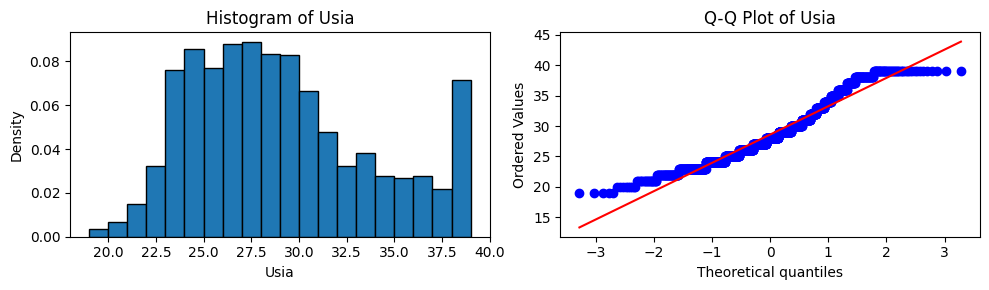

Shapiro-Wilk Test - p-value: 6.547894877463976e-21
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 2.684814908820723e-19
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Tekanan darah  (S)
------------------------------


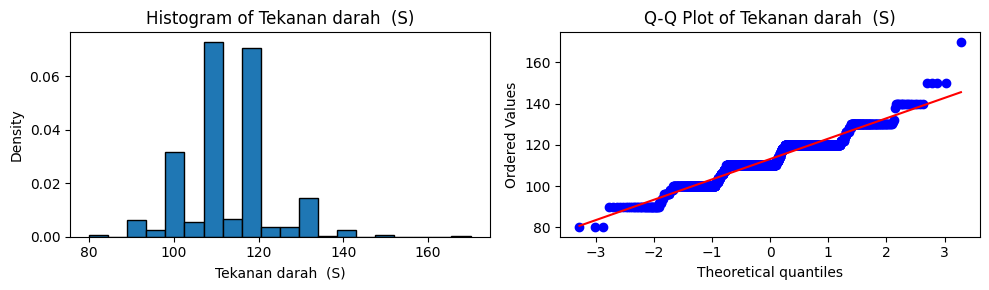

Shapiro-Wilk Test - p-value: 5.885639739224101e-23
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 8.143044452275995e-08
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: IMT (kg/m2)
------------------------------


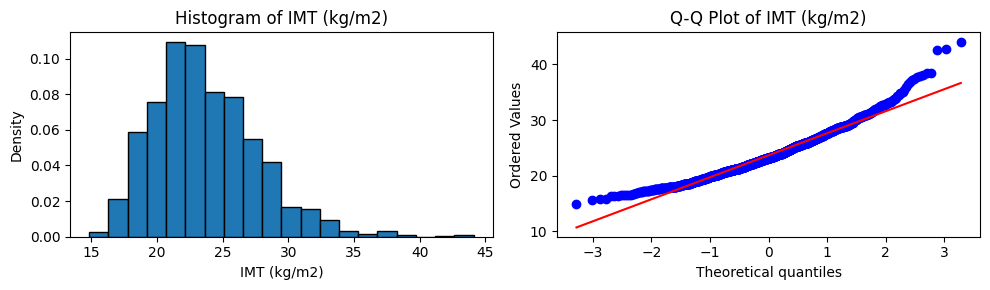

Shapiro-Wilk Test - p-value: 9.218852222197998e-18
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 5.588443686434393e-36
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Tinggi badan (cm)
------------------------------


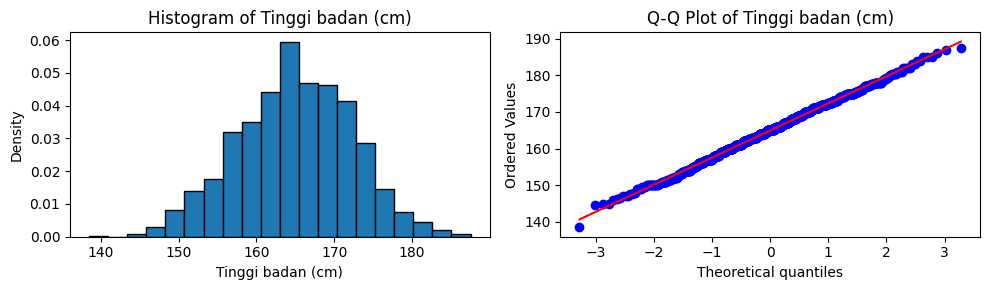

Shapiro-Wilk Test - p-value: 0.18821735783328564
The data is likely normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.4221648372967278
The data is likely normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Berat badan (kg)
------------------------------


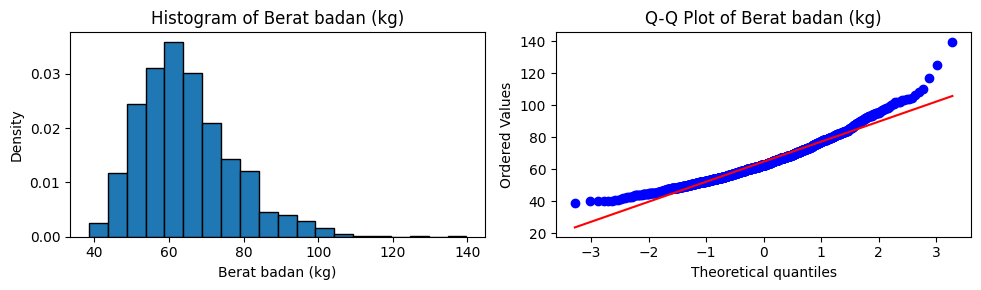

Shapiro-Wilk Test - p-value: 1.288222842579719e-19
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 4.160241841027242e-42
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Lingkar perut (cm)
------------------------------


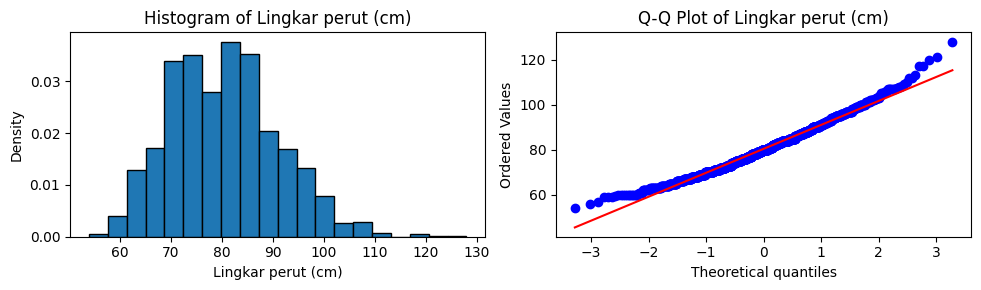

Shapiro-Wilk Test - p-value: 1.5481439318459373e-10
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 3.2263545976087383e-11
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Masa Kerja
------------------------------


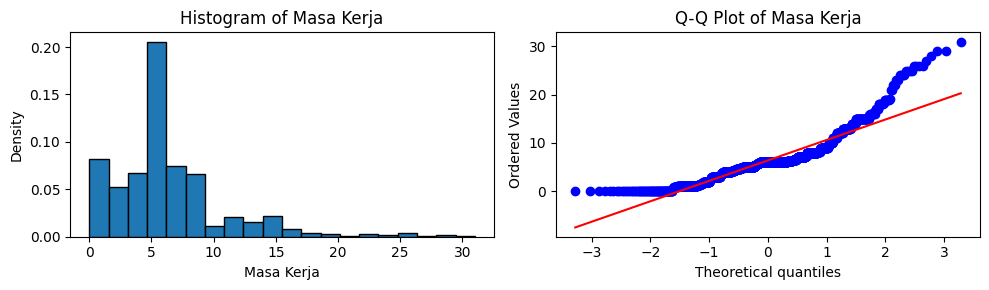

Shapiro-Wilk Test - p-value: 9.214969091398691e-33
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 6.735772765331977e-102
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Fat
------------------------------


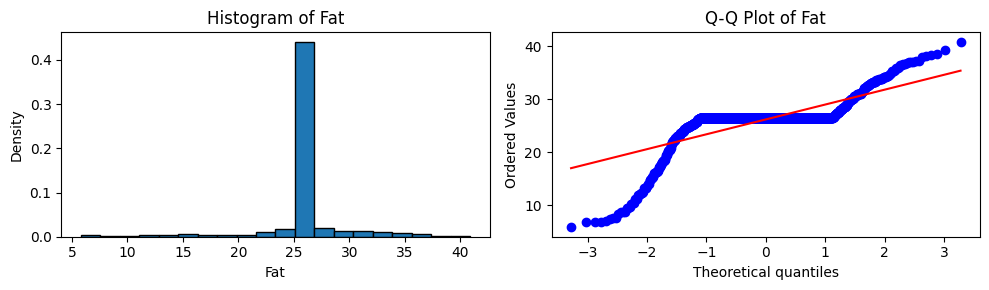

Shapiro-Wilk Test - p-value: 8.514890354175474e-49
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 6.888735600990703e-131
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Cholesterol Total (mg/dL)
------------------------------


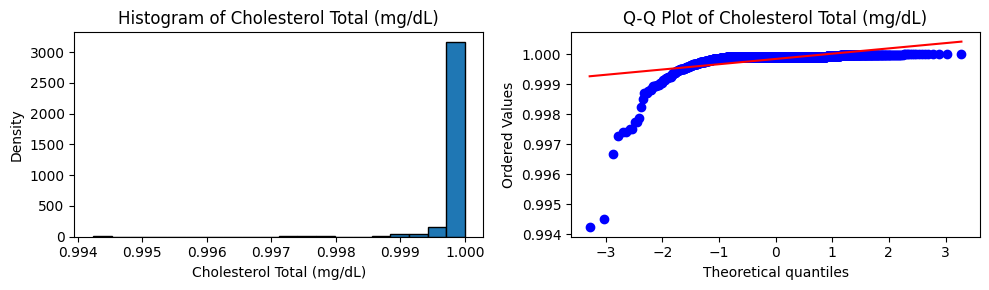

Shapiro-Wilk Test - p-value: 5.043713039025849e-58
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.0
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Glukosa Puasa (mg/dL)
------------------------------


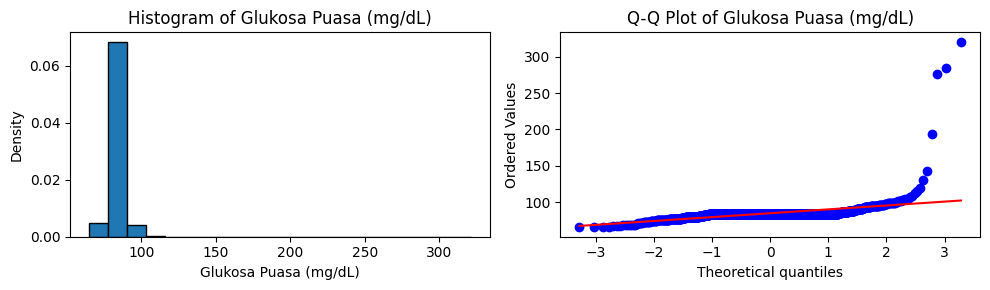

Shapiro-Wilk Test - p-value: 2.3764401757236644e-59
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.0
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Tekanan darah  (D)
------------------------------


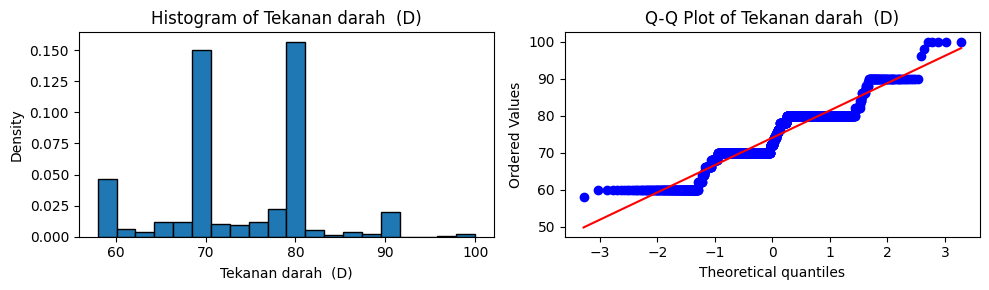

Shapiro-Wilk Test - p-value: 4.119573832051143e-27
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.40109931154074363
The data is likely normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Trigliserida (mg/dL)
------------------------------


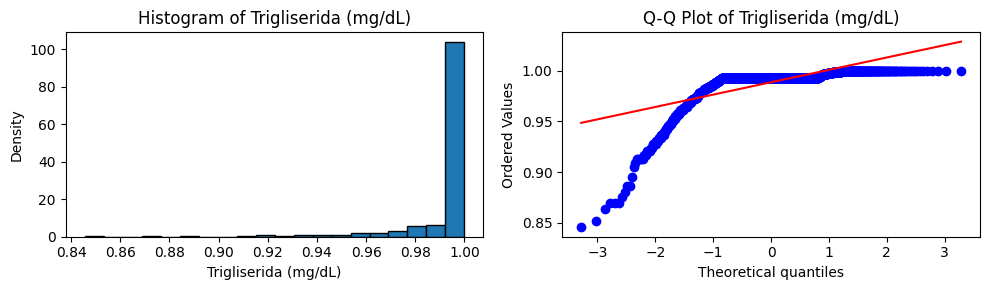

Shapiro-Wilk Test - p-value: 3.161991225426972e-52
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 1.5785791548661024e-251
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Visceral Fat
------------------------------


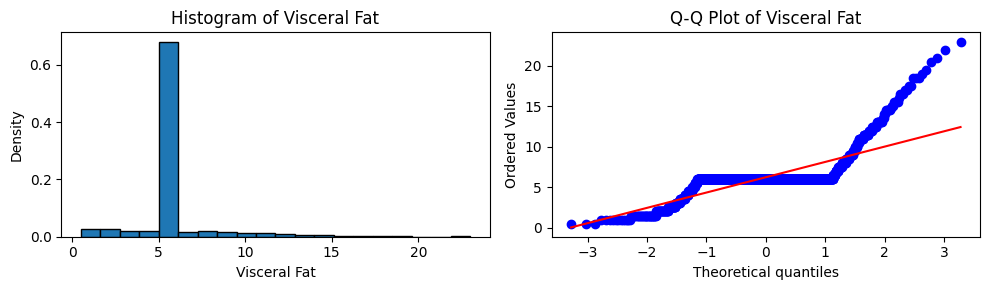

Shapiro-Wilk Test - p-value: 6.513974926759565e-48
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 3.4917857760988486e-159
The data is not normally distributed according to D'Agostino and Pearson's test.




In [174]:
columns = ['Usia', 'Tekanan darah  (S)', 'IMT (kg/m2)',
           'Tinggi badan (cm)', 'Berat badan (kg)', 'Lingkar perut (cm)', 'Masa Kerja', 'Fat', 'Cholesterol Total (mg/dL)',
           'Glukosa Puasa (mg/dL)',
           'Tekanan darah  (D)',
           'Trigliserida (mg/dL)',
           'Visceral Fat']
for column in columns:
    if df[column].dtype != 'object':  # Checking if column contains numerical data
        data = df[column].dropna()  # Drop missing values
        print("Normality test for column:", column)
        print("-" * 30)

        # Visual inspection
        plt.figure(figsize=(10, 3))
        plt.subplot(1, 2, 1)
        plt.hist(data, bins=20, edgecolor='black', density=True)
        plt.title('Histogram of ' + column)
        plt.xlabel(column)
        plt.ylabel('Density')

        plt.subplot(1, 2, 2)
        stats.probplot(data, dist="norm", plot=plt)
        plt.title('Q-Q Plot of ' + column)
        plt.tight_layout()
        plt.show()

        # Statistical tests
        stat, p = stats.shapiro(data)  # Shapiro-Wilk test
        print("Shapiro-Wilk Test - p-value:", p)
        if p > 0.05:
            print(
                "The data is likely normally distributed according to Shapiro-Wilk test.")
        else:
            print("The data is not normally distributed according to Shapiro-Wilk test.")

        stat, p = stats.normaltest(data)  # D'Agostino and Pearson's test
        print("D'Agostino and Pearson's Test - p-value:", p)
        if p > 0.05:
            print(
                "The data is likely normally distributed according to D'Agostino and Pearson's test.")
        else:
            print(
                "The data is not normally distributed according to D'Agostino and Pearson's test.")

        print("\n")

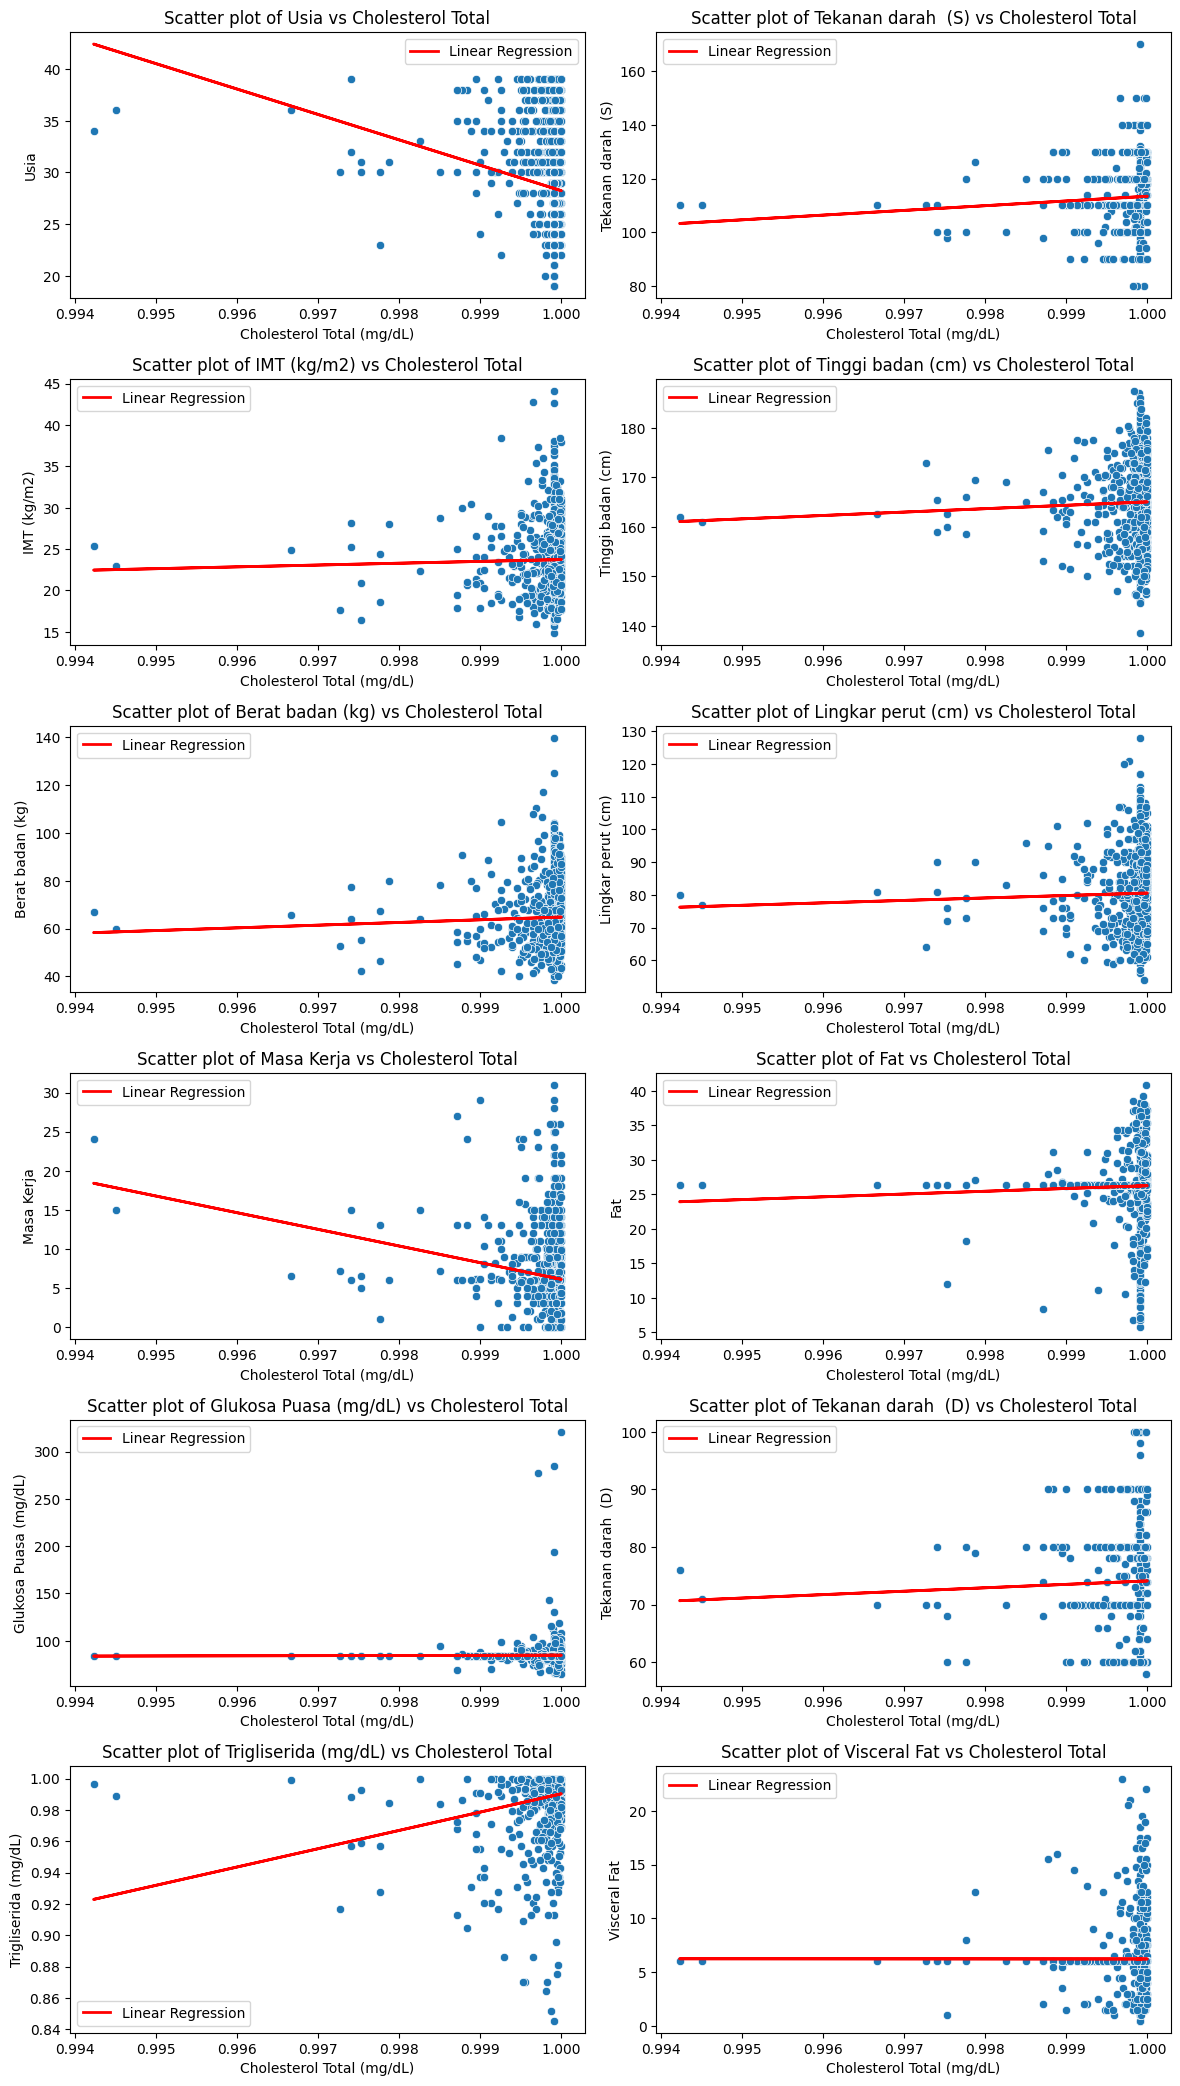

In [175]:
# Define the columns
columns = ['Usia', 'Tekanan darah  (S)', 'IMT (kg/m2)',
           'Tinggi badan (cm)', 'Berat badan (kg)', 'Lingkar perut (cm)', 'Masa Kerja', 'Fat',
           'Glukosa Puasa (mg/dL)',
           'Tekanan darah  (D)',
           'Trigliserida (mg/dL)',
           'Visceral Fat', 'Cholesterol Total (mg/dL)']

# Create subplots
fig, axs = plt.subplots(7, 2, figsize=(12, 24))

# Flatten the axes array
axs_flat = axs.flatten()

# Iterate over each column and plot against 'Cholesterol Total (mg/dL)'
for i, column in enumerate(columns[:-1]):
    # Extract data
    x = df['Cholesterol Total (mg/dL)'].values.reshape(-1, 1)
    y = df[column].values.reshape(-1, 1)

    # Scatter plot
    sns.scatterplot(x=x.flatten(), y=y.flatten(), ax=axs_flat[i])

    # Fit linear regression
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)

    # Plot regression line
    axs_flat[i].plot(x, y_pred, color='red', linestyle='-',
                     linewidth=2, label='Linear Regression')

    # Set labels and title
    axs_flat[i].set_xlabel('Cholesterol Total (mg/dL)')
    axs_flat[i].set_ylabel(column)
    axs_flat[i].set_title(f'Scatter plot of {column} vs Cholesterol Total')
    axs_flat[i].legend()

# Hide empty subplots
for i in range(len(columns)-1, len(axs_flat)):
    fig.delaxes(axs_flat[i])

plt.tight_layout()
plt.show()

In [176]:
df["Cholesterol Total (mg/dL)"].value_counts().head(10)/len(df)

Cholesterol Total (mg/dL)
0.999913    0.589993
0.999833    0.010456
0.999877    0.008962
0.999966    0.008215
0.999961    0.008215
0.999950    0.007468
0.999816    0.006721
0.999739    0.006721
0.999945    0.006721
0.999647    0.005975
Name: count, dtype: float64

# Exploring 0.999913 Cholesterol Total (mg/dL)


In [177]:
temp = df[df["Cholesterol Total (mg/dL)"] ==
   df["Cholesterol Total (mg/dL)"].value_counts().idxmax()]
temp.head(10)

,Responden,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Cholesterol Total (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir
0,1,M,19.0,126.0,88.0,172.5,49.5,16.53,66.0,84.0,0.999913,0.992966,26.4,6.0,0.97,Purworejo
1,2,M,19.0,120.0,80.0,158.0,53.6,21.50,71.0,84.0,0.999913,0.992966,26.4,6.0,0.60,Bogor
2,3,M,19.0,120.0,80.0,170.0,59.5,20.59,80.0,80.0,0.999913,0.992966,26.4,6.0,1.37,bandung
3,4,F,19.0,100.0,70.0,149.0,45.1,20.31,62.0,81.0,0.999913,0.992966,30.5,3.5,1.00,Jakarta
4,5,M,19.0,110.0,70.0,171.6,62.4,21.19,78.0,84.0,0.999913,0.992966,26.4,6.0,4.00,Teluk Betung
5,6,M,20.0,120.0,80.0,174.5,100.6,33.04,105.5,80.0,0.999913,0.992966,26.4,6.0,6.00,Jakarta
6,7,M,20.0,110.0,70.0,164.5,48.6,17.96,60.0,77.0,0.999913,0.992966,6.8,2.0,1.01,Cirebon
7,8,M,20.0,110.0,70.0,166.3,79.5,28.75,99.0,89.0,0.999913,0.992966,26.4,6.0,6.00,Jakarta
8,9,M,20.0,120.0,80.0,172.8,83.3,27.90,93.0,84.0,0.999913,0.992966,26.4,6.0,6.00,Jakarta
10,11,M,20.0,110.0,70.0,169.1,64.0,22.38,84.0,84.0,0.999913,0.992966,26.4,6.0,6.00,Jakarta


Normality test for column: Usia
------------------------------


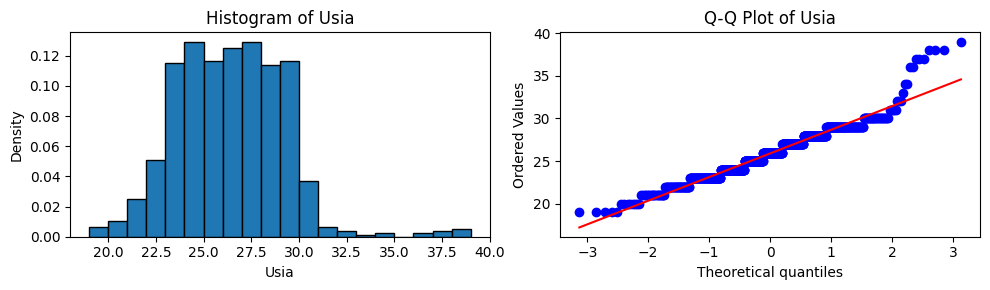

Shapiro-Wilk Test - p-value: 5.1085754870942205e-15
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 2.6146393216619982e-18
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Tekanan darah  (S)
------------------------------


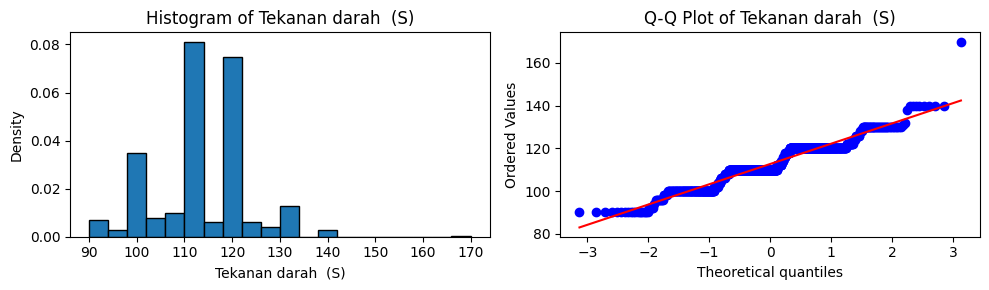

Shapiro-Wilk Test - p-value: 1.5051106621228812e-17
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 6.718261248554379e-07
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: IMT (kg/m2)
------------------------------


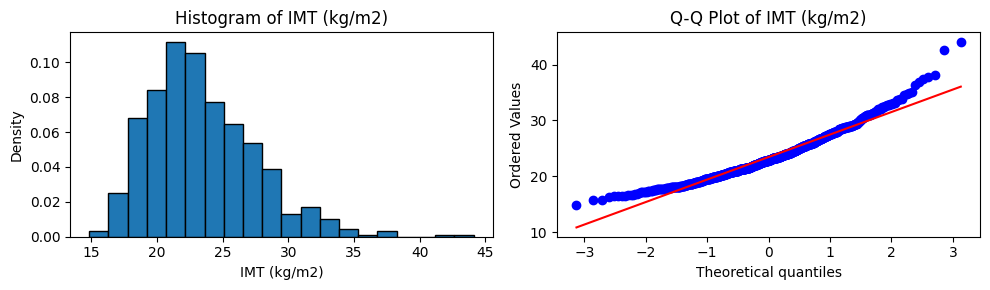

Shapiro-Wilk Test - p-value: 1.994856464974555e-14
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 2.325742821906012e-24
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Tinggi badan (cm)
------------------------------


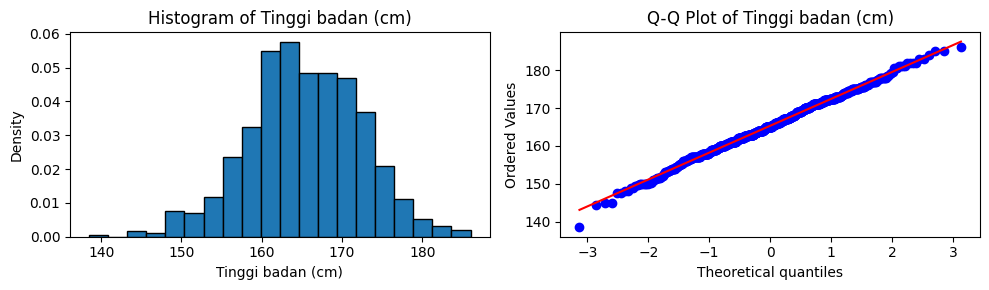

Shapiro-Wilk Test - p-value: 0.28434168543977695
The data is likely normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.4848787739593402
The data is likely normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Berat badan (kg)
------------------------------


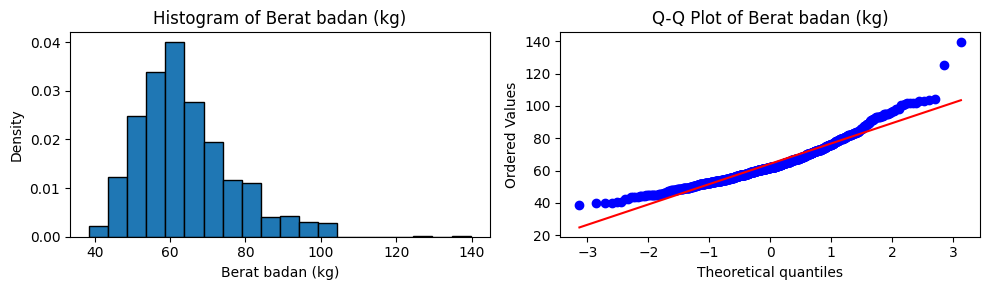

Shapiro-Wilk Test - p-value: 2.5249506903988114e-17
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 2.8837465963419785e-34
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Lingkar perut (cm)
------------------------------


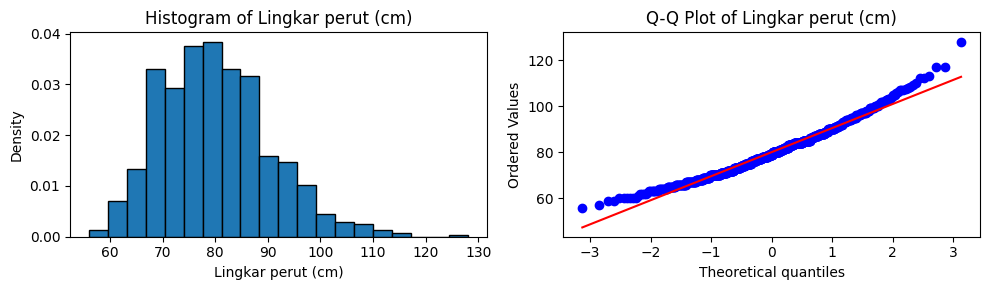

Shapiro-Wilk Test - p-value: 1.0018018647606852e-09
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 8.362888091020953e-12
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Masa Kerja
------------------------------


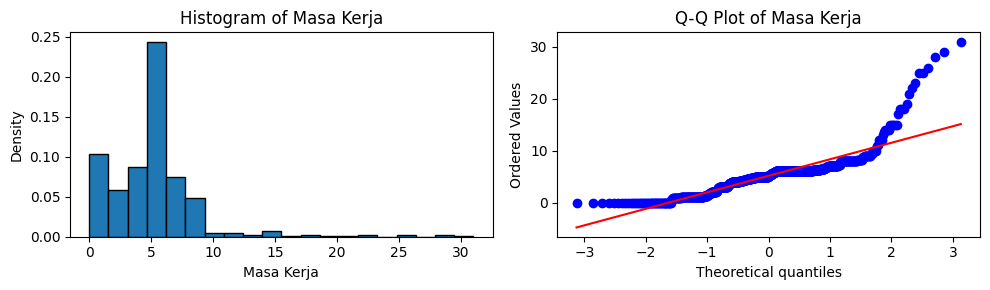

Shapiro-Wilk Test - p-value: 4.725818807722999e-31
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 2.8794909784169274e-105
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Fat
------------------------------


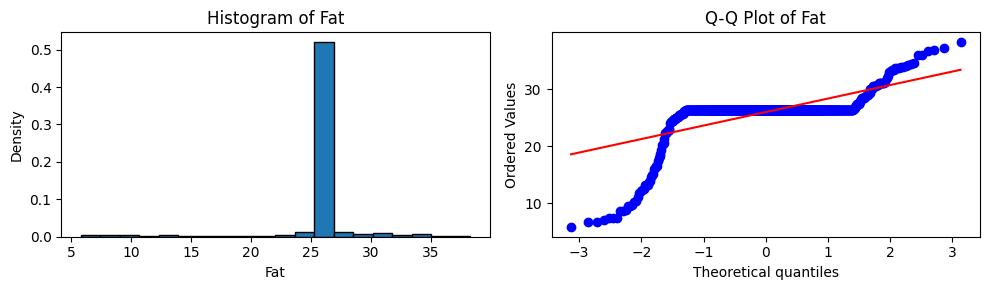

Shapiro-Wilk Test - p-value: 7.042944211873938e-44
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 5.68990764427046e-117
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Cholesterol Total (mg/dL)
------------------------------


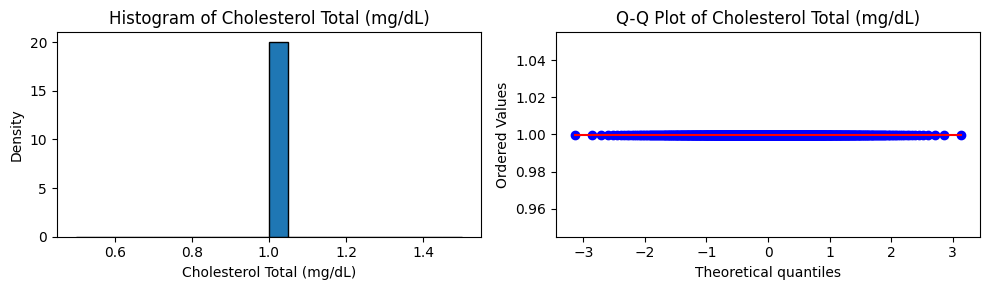

Shapiro-Wilk Test - p-value: 1.0
The data is likely normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: nan
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Glukosa Puasa (mg/dL)
------------------------------


C:\Users\Darrel D Poli\AppData\Local\Temp\ipykernel_22716\1843049673.py:28: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  stat, p = stats.shapiro(data)  # Shapiro-Wilk test
c:\Users\Darrel D Poli\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1584: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
c:\Users\Darrel D Poli\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1786: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


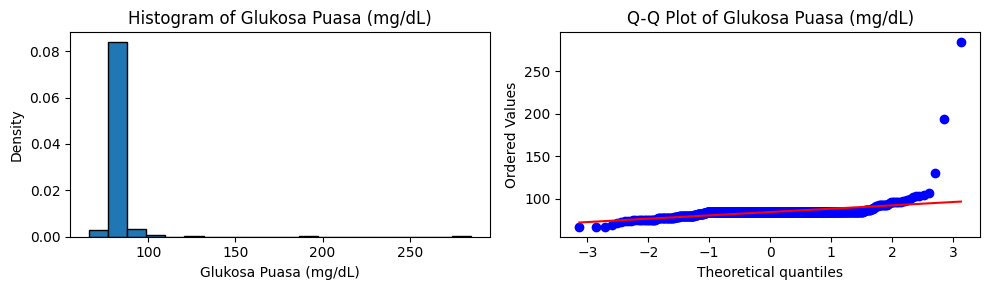

Shapiro-Wilk Test - p-value: 1.5030959446400575e-49
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.0
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Tekanan darah  (D)
------------------------------


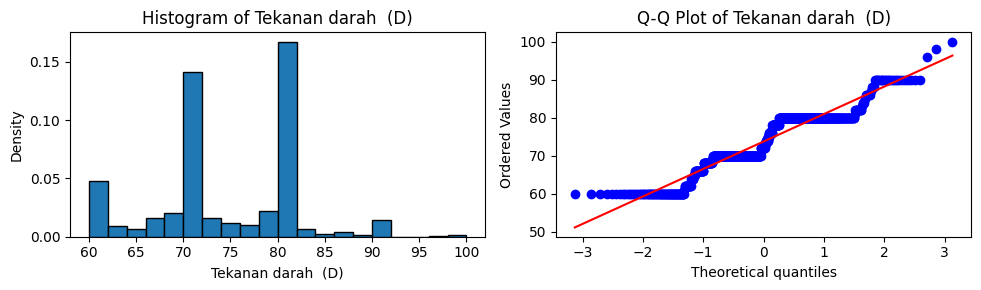

Shapiro-Wilk Test - p-value: 6.934333733379499e-21
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.04941778434790486
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Trigliserida (mg/dL)
------------------------------


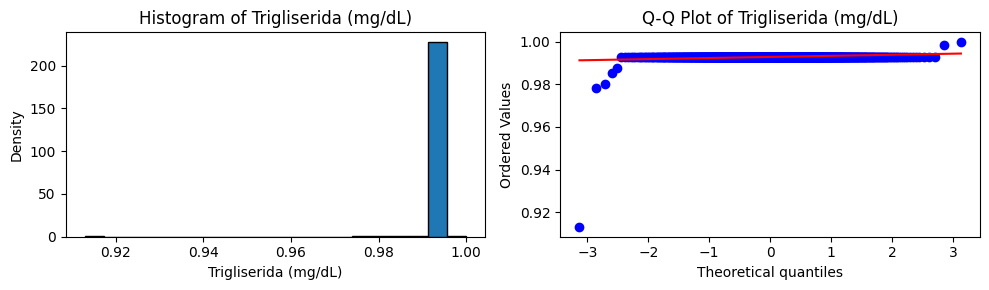

Shapiro-Wilk Test - p-value: 1.6922899106279558e-52
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 0.0
The data is not normally distributed according to D'Agostino and Pearson's test.


Normality test for column: Visceral Fat
------------------------------


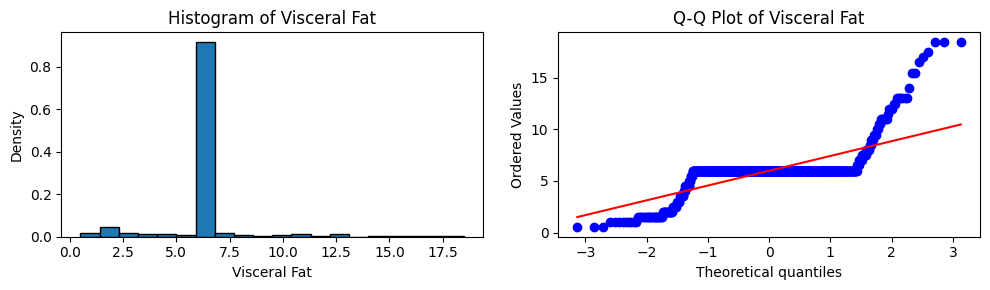

Shapiro-Wilk Test - p-value: 1.41244865238198e-41
The data is not normally distributed according to Shapiro-Wilk test.
D'Agostino and Pearson's Test - p-value: 1.2540438994329372e-89
The data is not normally distributed according to D'Agostino and Pearson's test.




In [178]:
columns = ['Usia', 'Tekanan darah  (S)', 'IMT (kg/m2)',
           'Tinggi badan (cm)', 'Berat badan (kg)', 'Lingkar perut (cm)', 'Masa Kerja', 'Fat', 'Cholesterol Total (mg/dL)',
           'Glukosa Puasa (mg/dL)',
           'Tekanan darah  (D)',
           'Trigliserida (mg/dL)',
           'Visceral Fat']
for column in columns:
    if temp[column].dtype != 'object':  # Checking if column contains numerical data
        data = temp[column].dropna()  # Drop missing values
        print("Normality test for column:", column)
        print("-" * 30)

        # Visual inspection
        plt.figure(figsize=(10, 3))
        plt.subplot(1, 2, 1)
        plt.hist(data, bins=20, edgecolor='black', density=True)
        plt.title('Histogram of ' + column)
        plt.xlabel(column)
        plt.ylabel('Density')

        plt.subplot(1, 2, 2)
        stats.probplot(data, dist="norm", plot=plt)
        plt.title('Q-Q Plot of ' + column)
        plt.tight_layout()
        plt.show()

        # Statistical tests
        stat, p = stats.shapiro(data)  # Shapiro-Wilk test
        print("Shapiro-Wilk Test - p-value:", p)
        if p > 0.05:
            print(
                "The data is likely normally distributed according to Shapiro-Wilk test.")
        else:
            print("The data is not normally distributed according to Shapiro-Wilk test.")

        stat, p = stats.normaltest(data)  # D'Agostino and Pearson's test
        print("D'Agostino and Pearson's Test - p-value:", p)
        if p > 0.05:
            print(
                "The data is likely normally distributed according to D'Agostino and Pearson's test.")
        else:
            print(
                "The data is not normally distributed according to D'Agostino and Pearson's test.")

        print("\n")

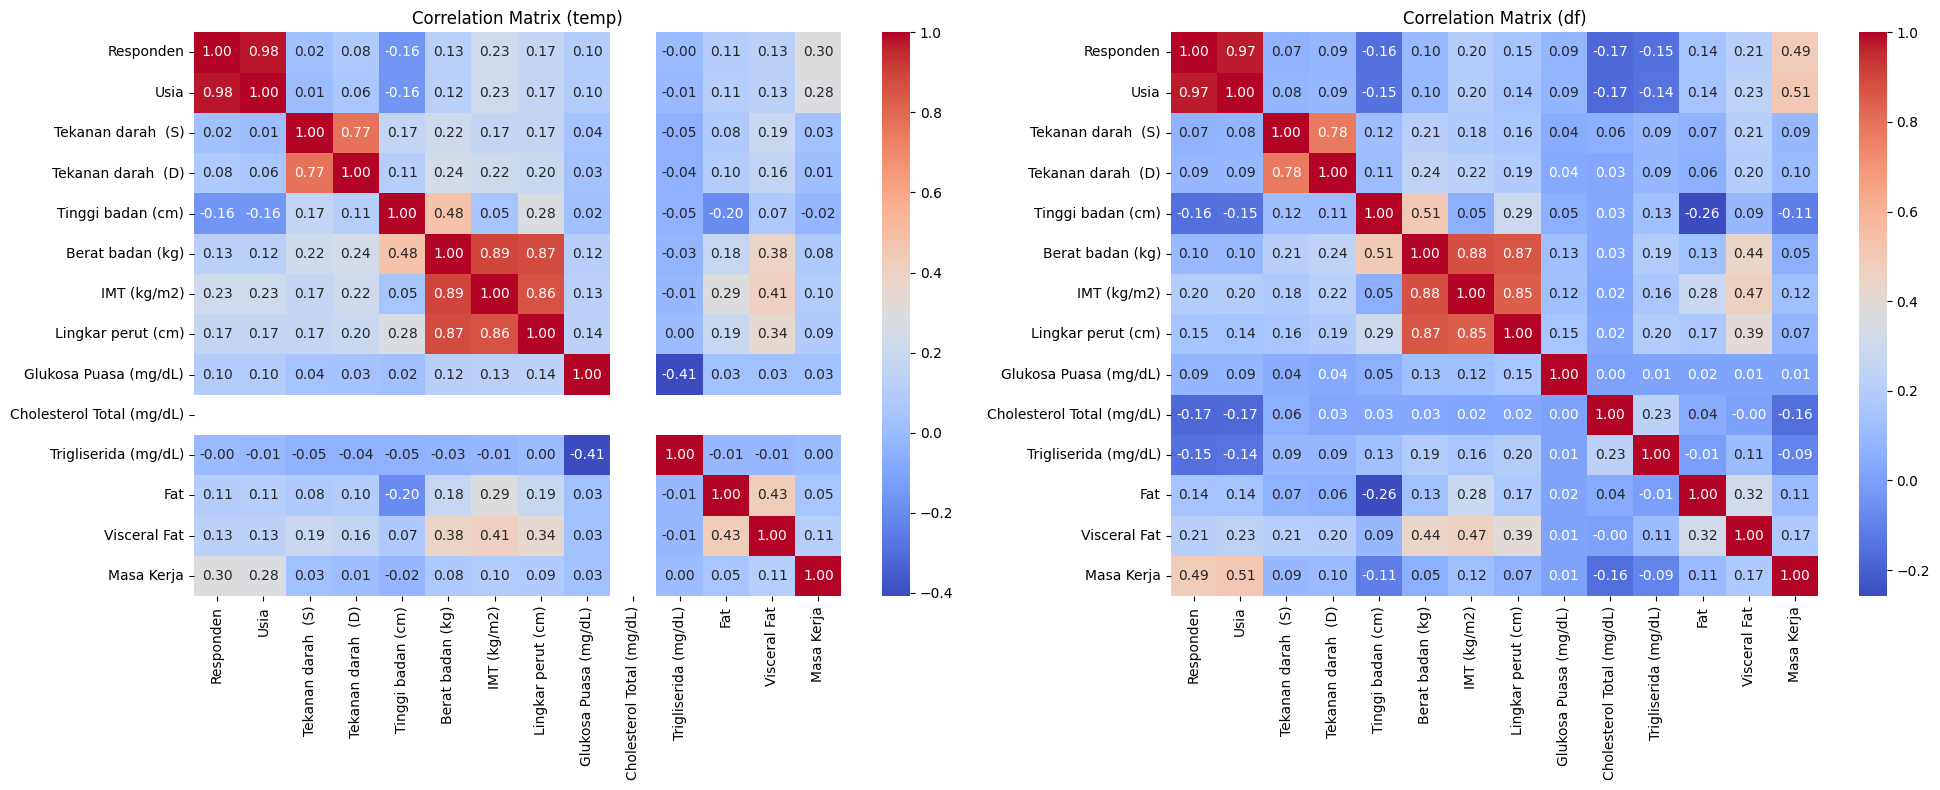

In [191]:
# Calculate correlation matrices
corr_temp = temp.corr(numeric_only=True)
corr_df = df.corr(numeric_only=True)

# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the first correlation matrix
sns.heatmap(corr_temp, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Matrix (temp)')

# Plot the second correlation matrix
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Matrix (df)')

plt.tight_layout()
plt.show()

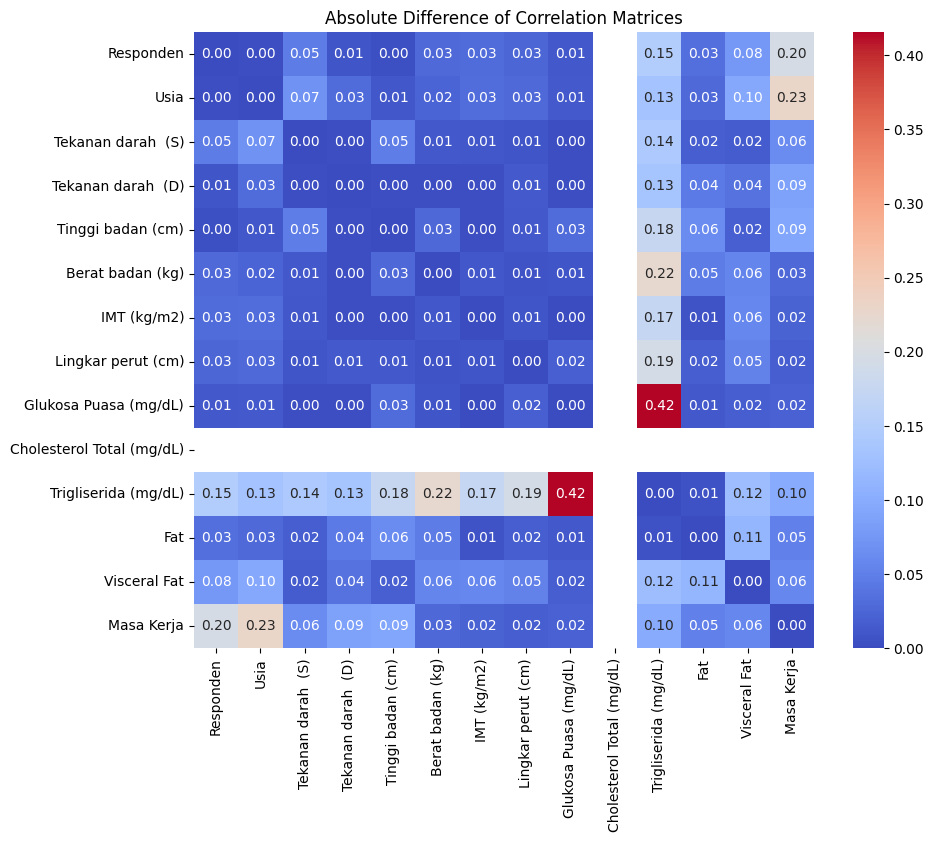

In [194]:
corr_diff = np.abs(corr_temp - corr_df)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Absolute Difference of Correlation Matrices')
plt.show()

In [179]:
# dup = df.duplicated(subset=['Jenis Kelamin', 'Tempat lahir', 'Tinggi badan (cm)'], keep=False)
# duplicated_data = df[dup].sort_values('Tinggi badan (cm)')
# df['Cholesterol Total (mg/dL)'] = df['Cholesterol Total (mg/dL)'].astype(str)